### Fetal Health Prediction using Classification Techniques

Classify fetal health in order to prevent child and maternal mortality.

In [1]:
#importing the libraries
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
#load a pickle file
#convert to pandas data frame
def load_dataset(df):
    df=pickle.load(open(df,'rb'))
    df=pd.DataFrame(df)
    df=df.values
    X=df[:,:-1]
    y=df[:,-1]
    return X,y

#splitting the data into train and test data
def split_data(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)#stratify=y
    return X_train,X_test,y_train,y_test

#Scaling the dataset
#standard scaler for independent variables
def scaler(X):
    scaler=StandardScaler()
    X=scaler.fit_transform(X)
    X=pd.DataFrame(X)
    return X

#evaluation function
def evaluation(y_test,y_pred):
    #print accuracy, recall, f1 score, precision metrics
    print('evaluation metrics:')
    print('classification_report',classification_report(y_test,y_pred))
    print('accuracy: ', accuracy_score(y_test,y_pred))
    print('recall: '  , recall_score(y_test,y_pred))
    print('f1_score: ', f1_score(y_test,y_pred))
    print('precision: ',precision_score(y_test,y_pred))
    #print confusion matrix
    print('\nconfusion matrix:')
    print('TN,FP,FN,TP')
    print('confusion matrix: ',confusion_matrix(y_test,y_pred))
    return

In [4]:
#load the EDA pickle file
df="C:\\Users\\acer\\Desktop\\ModelTuning_FetalHealth\\models\\ExploratoryDataAnalysis.pkl"
X,y=load_dataset(df)
#split the data into train and test data
X_train,X_test,y_train,y_test=split_data(X,y)
#scaling the train and test data
X_train=scaler(X_train)
X_test=scaler(X_test)

In [9]:
#model building
models = {'Logistic Regression':LogisticRegression(),
              'Naive Bayes':GaussianNB(),
              'Support Vector Classifier-linear':SVC(kernel='linear'),
              'Support Vector Classifier-Non linear':SVC(),
              'Decision Tree Classifier':DecisionTreeClassifier(),
              'Random Forest Classifier':RandomForestClassifier(),
              'Gradient Boosting Classifier':GradientBoostingClassifier()
              }#'KNN Classifier':KNeighborsClassifier(),

for index, model in models.items():
    #build the model
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(index + " : {:.2f}%".format(accuracy_score(y_pred,y_test)*100))

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 88.49%
Naive Bayes : 7.89%
Support Vector Classifier-linear : 89.27%
Support Vector Classifier-Non linear : 89.12%
Decision Tree Classifier : 89.91%
Random Forest Classifier : 91.80%
Gradient Boosting Classifier : 93.38%


KFold Cross validation 

In [10]:
#performs the evaluation
kfcv=KFold(n_splits=3, random_state=1, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=kfcv, scoring='accuracy', n_jobs=-1)
print(scores.mean())
#accuracy score which is normalized i.e between the value from 0-1, where 0 means none of the output were accurate and 1 means every prediction was accurate.

0.9418526031102097


StratifiedKFold Cross Validaition

In [11]:
#performs the evaluation
skcv=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=skcv, scoring='accuracy', n_jobs=-1)
print(scores.mean())
#accuracy score which is normalized i.e between the value from 0-1, where 0 means none of the output were accurate and 1 means every prediction was accurate.

0.9546991210277215


In [8]:
# function to make a pipeline with classifier input
#def pipe_maker(classifier):
#   '''Takes in a classifier, returns a pipeline'''
#   pipe = Pipeline([('clf', classifier(random_state=42))])
#    return pipe

# function to create a grid search containing pipeline
#def gridsearch_maker(pipeline, params):
#   '''Takes in a pipeline and param grid, returns GridSearchCV object'''
#   return GridSearchCV(estimator=pipeline,
#                       param_grid=params,
#                        scoring='recall',cv=10,n_jobs=-1)

# setting generic grid search parameters
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_small = [1.0, 0.5, 0.1]

Hyparameter Tuning with GridsearchCV

Best estimator values for LGRmodel: LogisticRegression(penalty='l1', solver='liblinear')

Best parameter values:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

Best Score - LR: 0.8938471940500339


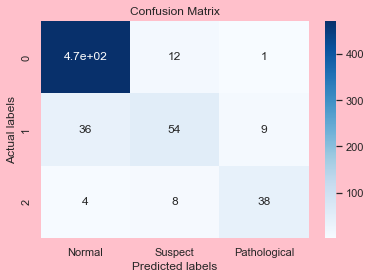

In [17]:
#Parameter tuning with GridSearchCV-Logistic Regression
estimator_lr = LogisticRegression()
parameters_lr = [{'penalty': ['l1', 'l2'],
                   'C': param_range_small,
                   'solver': ['liblinear']}]
# with GridSearch
grid_search_lr = GridSearchCV(estimator=estimator_lr,param_grid=parameters_lr,
                               scoring = 'accuracy',n_jobs = -1,cv = kfcv)
grid_search_lr.fit(X_train, y_train)

y_pred_lr =grid_search_lr.predict(X_test)

# Get the best estimator values.
print("Best estimator values for LGRmodel:", grid_search_lr.best_estimator_)

#Parameter setting that gave the best results on the hold out data.
print("\nBest parameter values: ", grid_search_lr.best_params_ )

#Mean cross-validated score of the best_estimator
print('\nBest Score - LR:', grid_search_lr.best_score_ )
sns.set(rc={'figure.facecolor':'pink'})
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, ax = ax, cmap = "Blues");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("Actual labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Best estimator values for KNN model: KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1, weights='distance')

Best parameter values:  {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Best Score - KNN: 0.9045698924731184


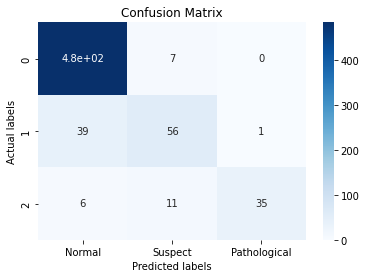

In [ ]:
#Parameter tuning with GridSearchCV -KNNC
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
# with GridSearch
grid_search_KNN = GridSearchCV(estimator=estimator_KNN,param_grid=parameters_KNN,
                               scoring = 'accuracy',n_jobs = -1,cv = kfcv)
grid_search_KNN.fit(X_train, y_train)

y_pred_KNN =grid_search_KNN.predict(X_test)

# Get the best estimator values.
print("Best estimator values for KNN model:", grid_search_KNN.best_estimator_)

#Parameter setting that gave the best results on the hold out data.
print("\nBest parameter values: ", grid_search_KNN.best_params_ ) 

#Mean cross-validated score of the best_estimator
print('\nBest Score - KNN:', grid_search_KNN.best_score_ )

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot=True, ax = ax, cmap = "Blues");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("Actual labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Best estimator values for SVC model: SVC(kernel='linear')

Best parameter values:  {'kernel': 'linear'}

Best Score - SVC: 0.9053414469235971


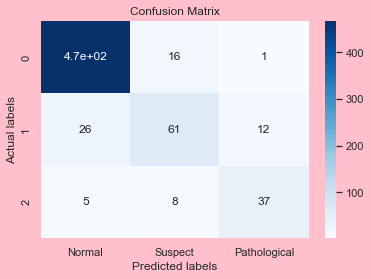

In [18]:
#gridsearch and randomsearch-SVC
estimator_svc = SVC()
parameters = [{ 'kernel': ['linear']},
             { 'kernel': ['rbf'],
              'gamma': [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7]}]

grid_params_svm = [{'kernel': ['linear', 'rbf'],
                    'C': param_range}]

grid_search_svc = GridSearchCV(estimator=estimator_svc,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=kfcv,
                          n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

y_pred_svc =grid_search_svc.predict(X_test)

# Get the best estimator values.
print("Best estimator values for SVC model:", grid_search_svc.best_estimator_)

#Parameter setting that gave the best results on the hold out data.
print("\nBest parameter values: ", grid_search_svc.best_params_ ) 

#Mean cross-validated score of the best_estimator
print('\nBest Score - SVC:', grid_search_svc.best_score_ )

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, ax = ax, cmap = "Blues");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("Actual labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Best estimator values for RFC model: RandomForestClassifier(max_depth=10)

Best parameter values:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Score - RFC: 0.9425287356321839


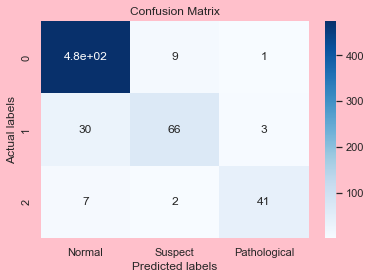

In [19]:
# fitting Random Forest pipeline
estimator_rfc = RandomForestClassifier()
# setting grid search parameters
grid_params_rfc= [{'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]}]
# creating grid search object
grid_search_rfc = GridSearchCV(estimator=estimator_rfc,
                          param_grid=grid_params_rfc,
                          scoring='accuracy',
                          cv=kfcv,
                          n_jobs=-1)
grid_search_rfc.fit(X_train, y_train)
#rfc_classification=grid_search_rfc.fit(X_train, y_train)

y_pred_rfc =grid_search_rfc.predict(X_test)

# Get the best estimator values.
print("Best estimator values for RFC model:", grid_search_rfc.best_estimator_)

#Parameter setting that gave the best results on the hold out data.
print("\nBest parameter values: ", grid_search_rfc.best_params_ ) 

#Mean cross-validated score of the best_estimator
print('\nBest Score - RFC:', grid_search_rfc.best_score_ )

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, ax = ax, cmap = "Blues");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("Actual labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [21]:
# important_features = pd.DataFrame({'Features': X_train.columns, 
#                                    'Importance': rfc_classification.feature_importances_})
# # sort the dataframe in the descending order according to the feature importance
# important_features = important_features.sort_values('Importance', ascending = False)
# # create a barplot to visualize the features based on their importance
# sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# # add plot and axes labels
# # set text size using 'fontsize'
# plt.title('Feature Importance', fontsize = 15)
# plt.xlabel('Importance', fontsize = 15)
# plt.ylabel('Features', fontsize = 15)

Best estimator values for DTC model: DecisionTreeClassifier(max_depth=5, min_samples_split=9)

Best parameter values:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 9}

Best Score - DTC: 0.9283299526707234


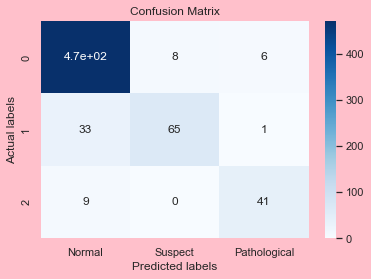

In [22]:
# fitting Decision Tree Classifier pipeline
estimator_dtc = DecisionTreeClassifier()
# setting grid search parameters
grid_params_dtc= [{'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]}]
# creating grid search object
grid_search_dtc = GridSearchCV(estimator=estimator_dtc,
                          param_grid=grid_params_dtc,
                          scoring='accuracy',
                          cv=kfcv,
                          n_jobs=-1)
grid_search_dtc.fit(X_train, y_train)

y_pred_dtc =grid_search_dtc.predict(X_test)

# Get the best estimator values.
print("Best estimator values for DTC model:", grid_search_dtc.best_estimator_)

#Parameter setting that gave the best results on the hold out data.
print("\nBest parameter values: ", grid_search_dtc.best_params_ ) 

#Mean cross-validated score of the best_estimator
print('\nBest Score - DTC:', grid_search_dtc.best_score_ )

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_dtc), annot=True, ax = ax, cmap = "Blues");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("Actual labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Best estimator values for GBC model: GradientBoostingClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=7)

Best parameter values:  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 7}

Best Score - GBC: 0.949290060851927


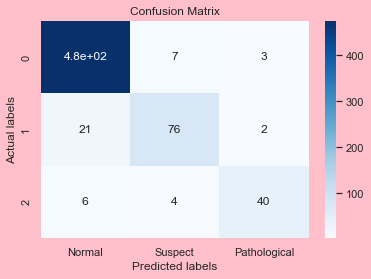

In [23]:
# fitting Gradient Boosting pipeline
estimator_gbc = GradientBoostingClassifier()
# setting grid search parameters
grid_params_gbc= [{'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]}]#'criterion': ['gini', 'entropy']
# creating grid search object
grid_search_gbc = GridSearchCV(estimator=estimator_gbc,
                          param_grid=grid_params_gbc,
                          scoring='accuracy',
                          cv=kfcv,
                          n_jobs=-1)
grid_search_gbc.fit(X_train, y_train)

y_pred_gbc =grid_search_gbc.predict(X_test)

# Get the best estimator values.
print("Best estimator values for GBC model:", grid_search_gbc.best_estimator_)

#Parameter setting that gave the best results on the hold out data.
print("\nBest parameter values: ", grid_search_gbc.best_params_ ) 

#Mean cross-validated score of the best_estimator
print('\nBest Score - GBC:', grid_search_gbc.best_score_ )

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_gbc), annot=True, ax = ax, cmap = "Blues");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("Actual labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

We tried different algorithms for fetal-health dataset among them the Random Forest and Gradient boosting algorithms are performing best for this dataset with an accuracy of 94% on the test dataset.

In [25]:
with open(r'C:\Users\acer\Desktop\ModelTuning_FetalHealth\models\train&test_best_model.pkl','wb') as f:
    pickle.dump(grid_params_gbc,f)